<a href="https://colab.research.google.com/github/Cosmicbaggel/My-Repos-for-collab-personal-use/blob/New-Repo-Personal/SEC02_CSC306_Fall2023_Pandas_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to Pandas


## Basic Pandas Concepts

Some very basic Pandas and python concepts to get started

#### Import the pandas package

In [ ]:
import pandas as pd

#### Create a simple DataFrame

- syntax: pd.DataFrame({column1 : value1, column2 : value2, column3 : value3})

You can have anything as column names and anything as values.

The only requirement is to have all value lists being of equal length (all are of length 3 in this example)

There are many ways to create a data frame and you will see some more during the course. All of them can be seen documented [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [ ]:
df = pd.DataFrame({'name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'pet':['cat', 'dog','bird']})

df

,name,age,pet
0,Bob,20,cat
1,Jen,30,dog
2,Tim,40,bird


#### View the column names and index values

The index is one of the most important concepts in pandas.

Each dataframe has only a single index which is always available as `df.index` and if you do not supply one (as we did not for this dataframe) a new one is made automatically.

Indexes define how to access rows of the dataframe.

The simplest index is the range index but there are more complex ones like interval index, datetime index and multi index.

We will explore indexes more in depth during the course of this lecture.

In [ ]:
print(df.columns)
print(df.index)

Index(['name', 'age', 'pet'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


#### Select a column by name in 2 different ways

These two ways are equivalent and can be used interchangeably almost always.

The primary exception is when the name of the column contains spaces. If for example we had a column called "weekly sales" we have to use df['weekly sales'] because `df.weekly sales` is a syntactic error.

In [ ]:
print(df['name'])
print(df.name)

0    Bob
1    Jen
2    Tim
Name: name, dtype: object
0    Bob
1    Jen
2    Tim
Name: name, dtype: object


#### Select multiple columns

To select multiple columns we use `df[columns_to_select]` where `columns_to_select` are the columns we are interested in given as a simple python list. As the result we will get another data frame.

This is the equivalent of listing columns names in `SELECT` part of a sql query.

In [ ]:
df[['name','pet']]

#### Select a row by index

Regular selection of rows goes via its index. When using range indices we can access rows using integer indices but this will not work when using datetime index for example.

We can always access any row in the dataframe using `.iloc[i]` for some integer i.

The result is a series object from which we can access values by using column indexing.

In [ ]:
df.iloc[0]

name    Bob
age      20
pet     cat
Name: 0, dtype: object

### Sort Function

- pandas.pydata.org
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

#### Sort the data by pet

There are two ways to sort.
- By index
- By value

By value means sorting according to value in a column.

In this example we sort the rows of the dataframe based on values in 'pet' column.

The parameter `ascending = True` means that we want the rows sorted in ascending order. This is the same as sql 'ASC'. To get descending order use `ascending = False`.

`inplace` is very important and you should always remember it. When `inplace=True` the dataframe is modified in place which means that no copies are made and your previous data stored in the dataframe is lost. By default inplace is always False. When it is false a copy is made of your data and that copy is sorted and returned as output.

The output of `sort_values` is always a dataframe returned but the behaviour depends strongly on the `inplace` parameter.

In [ ]:
df.sort_values('pet',inplace=True, ascending=True)

### Indexing with DataFrames

Everything we discussed about indexing in numpy arrays applies to dataframes as well.

DataFrames are very similar to 2d-arrays with the main exception being that in DataFrames you can index using strings (column names).

#### View the index after the sort

In [ ]:
df

#### Difference between loc and iloc

- `.loc` selection is based on the value of the index. For example if the index was categorical we could index via some category.
- `.iloc` selection is **always** based on integer positions. When using iloc we are treating the dataframe as 2d-array with no special structure compared to the case of `.loc`

In [ ]:
df.loc[0] #index based

In [ ]:
df.iloc[0] #relative position based indexing

#### Use iloc to select all rows of a column

This will select all rows of the second column.

Remember `:` = `::1`

First index is always row and second is always column when dealing with dataframes.

In [ ]:
df.iloc[:,2]

#### Use iloc to select the last row

In [ ]:
df.iloc[-1,:]

## Basic Pandas Concept Exercises

In [ ]:
sales = [100,130,119,92,35]
customer_account = ['B100','J101','X102','P103','R104']
city = ['BOS','LA','NYC','SF','CHI']

#### Create a DataFrame with the data above

In [ ]:
df = pd.DataFrame({'sales':sales,
                   'customer_account':customer_account,
                   'city':city})

#### What is the name of the first column?

In [ ]:
df


#### Sort the DataFrame by city in descending order (check the documentation for sort)

In [ ]:
df.sort_values('city',inplace=True, ascending=False)
df

#### Which customer is in the last row of the DataFrame?

In [ ]:
df.iloc[-1]

#### Reorder the columns with customer in the first column

##**Introduction to Pandas and Plotting**
Pandas is a Python library used for data analysis.
Pandas documentation [here](https://pandas.pydata.org/docs/).

Python libraries are a collection of code (or related modules) that someone else wrote and that can be used repeatedly to make tasks more efficient. In this notebook we will also import Matplotlib (Plotting & Visualization in Python) and NumPy (used for scientific computing).

In [ ]:
# work through this notebook to learn how to use Pandas

### Importing pandas

In [ ]:
import pandas as pd

In [ ]:
!wget https://gist.githubusercontent.com/yppmark/d907dc265a84cac76ba7/raw/5b8a1c8df62cde2ba2b599cfa6404c6fd165ca02/SleepInMammals.csv

--2023-11-14 20:44:13--  https://gist.githubusercontent.com/yppmark/d907dc265a84cac76ba7/raw/5b8a1c8df62cde2ba2b599cfa6404c6fd165ca02/SleepInMammals.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2056 (2.0K) [text/plain]
Saving to: ‘SleepInMammals.csv’

SleepInMammals.csv  100%[===================>]   2.01K  --.-KB/s    in 0s      

2023-11-14 20:44:13 (32.1 MB/s) - ‘SleepInMammals.csv’ saved [2056/2056]



### Loading data

In [ ]:
data = pd.read_csv('SleepInMammals.csv')

### Looking at data

In [ ]:
# looking at our data
data

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index
0,African giant pouched rat,1.000,6.60,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian elephant,2547.000,4603.00,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.50,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big brown bat,0.023,0.30,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian tapir,160.000,169.00,5.2,1.0,6.2,30.4,392.0,4,5,4
5,Cat,3.300,25.60,10.9,3.6,14.5,28.0,63.0,1,2,1
6,Chimpanzee,52.160,440.00,8.3,1.4,9.7,50.0,230.0,1,1,1
7,Chinchilla,0.425,6.40,11.0,1.5,12.5,7.0,112.0,5,4,4
8,Cow,465.000,423.00,3.2,0.7,3.9,30.0,281.0,5,5,5
9,Eastern American mole,0.075,1.20,6.3,2.1,8.4,3.5,42.0,1,1,1


In [ ]:
# looking at the first 3 lines
data.head(3)


,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index
0,African giant pouched rat,1.00,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian elephant,2547.00,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4


In [ ]:
# looking at the last 3 lines
data.tail(3)

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index
37,Tree shrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
38,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
39,Water opossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1


### Look at one column

In [ ]:
data[['Brain Weight (g)']]

,Brain Weight (g)
0,6.60
1,4603.00
2,179.50
3,0.30
4,169.00
5,25.60
6,440.00
7,6.40
8,423.00
9,1.20


In [ ]:
# displaying math operations, for example convert grams to Kg
data[['Brain Weight (g)']]/1000


,Brain Weight (g)
0,0.00660
1,4.60300
2,0.17950
3,0.00030
4,0.16900
5,0.02560
6,0.44000
7,0.00640
8,0.42300
9,0.00120


### Making new columns

In [ ]:
data['Relative brain weight'] = data['Brain Weight (g)'] / (data['Body Weight (kg)'] * 1000)
data.head(2)

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
0,African giant pouched rat,1.0,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,0.006600
1,Asian elephant,2547.0,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.001807


In [ ]:
# display certain columns
['Species of animal', 'Relative brain weight', 'Total sleep (hrs/day)']

['Species of animal', 'Relative brain weight', 'Total sleep (hrs/day)']

In [ ]:
data[['Species of animal', 'Relative brain weight', 'Total sleep (hrs/day)']].head(3)


,Species of animal,Relative brain weight,Total sleep (hrs/day)
0,African giant pouched rat,0.006600,8.3
1,Asian elephant,0.001807,3.9
2,Baboon,0.017014,9.8


In [ ]:
smaller_data = data[['Species of animal', 'Relative brain weight', 'Total sleep (hrs/day)']]
smaller_data

,Species of animal,Relative brain weight,Total sleep (hrs/day)
0,African giant pouched rat,0.006600,8.3
1,Asian elephant,0.001807,3.9
2,Baboon,0.017014,9.8
3,Big brown bat,0.013043,19.7
4,Brazilian tapir,0.001056,6.2
5,Cat,0.007758,14.5
6,Chimpanzee,0.008436,9.7
7,Chinchilla,0.015059,12.5
8,Cow,0.000910,3.9
9,Eastern American mole,0.016000,8.4


from matplotlib import pyplot as plt
smaller_data['Relative brain weight'].plot(kind='hist', bins=20, title='Relative brain weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smaller_data['Total sleep (hrs/day)'].plot(kind='hist', bins=20, title='Total sleep (hrs/day)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smaller_data.plot(kind='scatter', x='Relative brain weight', y='Total sleep (hrs/day)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smaller_data['Relative brain weight'].plot(kind='line', figsize=(8, 4), title='Relative brain weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
smaller_data['Total sleep (hrs/day)'].plot(kind='line', figsize=(8, 4), title='Total sleep (hrs/day)')
plt.gca().spines[['top', 'right']].set_visible(False)

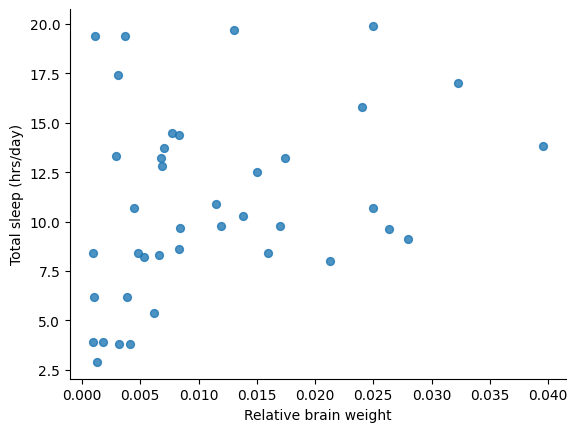

In [ ]:
from matplotlib import pyplot as plt
smaller_data.plot(kind='scatter', x='Relative brain weight', y='Total sleep (hrs/day)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### Filtering a dataframe

In [ ]:
data[data['Species of animal']=='Baboon']

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,0.017014


In [ ]:
data['Species of animal']=='Baboon'

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,0.017014


In [ ]:
data[data['Body Weight (kg)'] > 10]

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
1,Asian elephant,2547.00,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.001807
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,0.017014
4,Brazilian tapir,160.00,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,0.001056
6,Chimpanzee,52.16,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1,0.008436
8,Cow,465.00,423.0,3.2,0.7,3.9,30.0,281.0,5,5,5,0.000910
13,Goat,27.66,115.0,3.3,0.5,3.8,20.0,148.0,5,5,5,0.004158
15,Gray seal,85.00,325.0,4.7,1.5,6.2,41.0,310.0,1,3,1,0.003824
18,Horse,521.00,655.0,2.1,0.8,2.9,46.0,336.0,5,5,5,0.001257
21,Human,62.00,1320.0,6.1,1.9,8.0,100.0,267.0,1,1,1,0.021290
29,Pig,192.00,180.0,6.5,1.9,8.4,27.0,115.0,4,4,4,0.000937


In [ ]:
bigones = data[data['Body Weight (kg)'] > 10]
bigones

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
1,Asian elephant,2547.00,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.001807
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,0.017014
4,Brazilian tapir,160.00,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,0.001056
6,Chimpanzee,52.16,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1,0.008436
8,Cow,465.00,423.0,3.2,0.7,3.9,30.0,281.0,5,5,5,0.000910
13,Goat,27.66,115.0,3.3,0.5,3.8,20.0,148.0,5,5,5,0.004158
15,Gray seal,85.00,325.0,4.7,1.5,6.2,41.0,310.0,1,3,1,0.003824
18,Horse,521.00,655.0,2.1,0.8,2.9,46.0,336.0,5,5,5,0.001257
21,Human,62.00,1320.0,6.1,1.9,8.0,100.0,267.0,1,1,1,0.021290
29,Pig,192.00,180.0,6.5,1.9,8.4,27.0,115.0,4,4,4,0.000937


In [ ]:
bigones.to_csv('only_the_big_ones.csv', index=False)

In [ ]:
noelephant = data[data['Body Weight (kg)'] < 1000]

### Tricky things:
* ands and ors are different in pandas (and = &, or = |)
* there are some pandas-specific methods, like .isin() and pd.notnull()

In [ ]:
# in pandas:
# &  (and)
# |  (or)

pandas.core.series.Series

In [ ]:
data['Species of animal']=='Baboon') data[(or (data['Species of animal']=='Asian elephant')]
# this won't work!

ValueError: ignored

In [ ]:
(data['Species of animal']=='Baboon') | (data['Species of animal']=='Asian elephant')

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
Name: Species of animal, dtype: bool

In [ ]:
data[(data['Species of animal']=='Baboon') | (data['Species of animal']=='Asian elephant')]

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
1,Asian elephant,2547.00,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.001807
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,0.017014


In [ ]:
data[data['Species of animal'].isin(['Baboon', 'Asian elephant'])]

,Species of animal,Body Weight (kg),Brain Weight (g),Slow wave sleep (hrs/day),Paradoxical sleep (hrs/day),Total sleep (hrs/day),Maximum life span (years),Gestation time (days),Predation index,Sleep exposure index,Overall danger index,Relative brain weight
1,Asian elephant,2547.00,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,0.001807
2,Baboon,10.55,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,0.017014


### Practice filtering the data here!

#**Plotting**

<Axes: xlabel='Body Weight (kg)'>

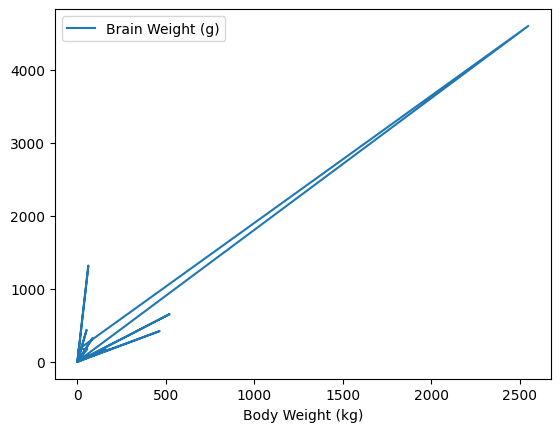

In [ ]:
# you can plot in pandas:
data.plot(x='Body Weight (kg)', y='Brain Weight (g)')

# but Matplotlib is better for plotting!

Matplotlib is a plotting library. Documentation [here](https://matplotlib.org/)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Brain Weight')

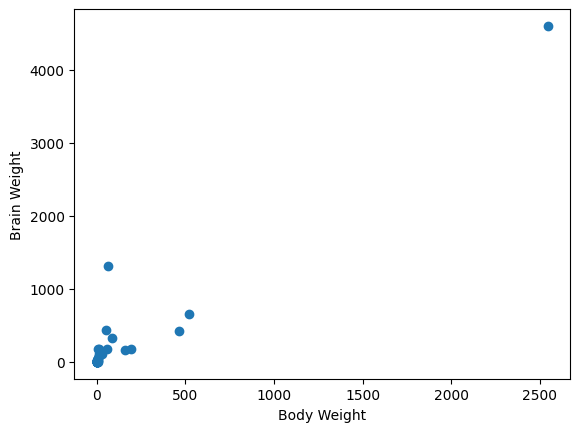

In [ ]:
plt.scatter(data['Body Weight (kg)'], data['Brain Weight (g)'])
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

Text(0, 0.5, 'Brain Weight')

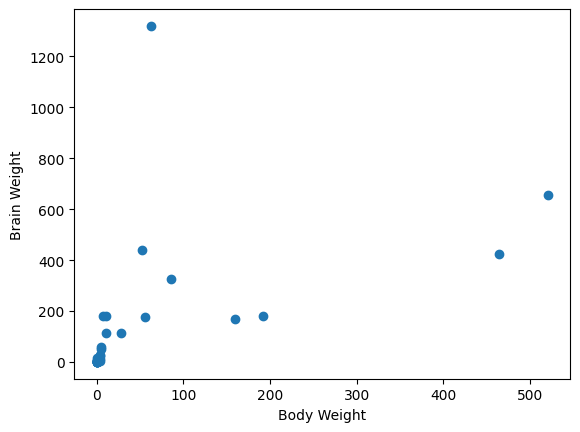

In [ ]:
plt.scatter(noelephant['Body Weight (kg)'], noelephant['Brain Weight (g)'])
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

Text(0, 0.5, 'Total sleep (hrs/day)')

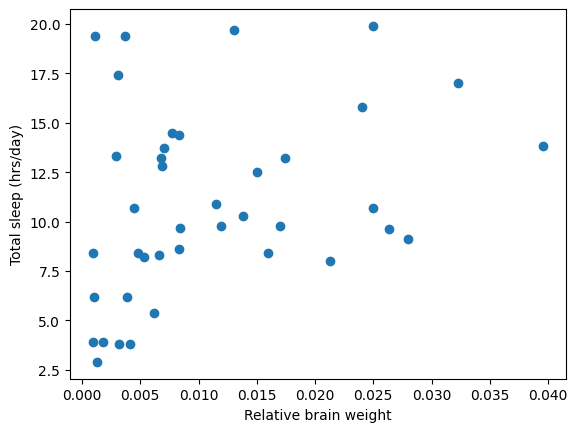

In [ ]:
plt.scatter(data['Relative brain weight'], data['Total sleep (hrs/day)'])
plt.xlabel('Relative brain weight')
plt.ylabel('Total sleep (hrs/day)')

In [ ]:
import seaborn as sns

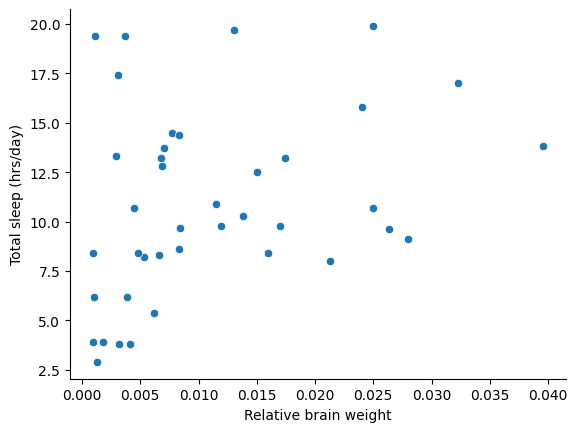

In [ ]:
sns.scatterplot(data=data, x='Relative brain weight', y='Total sleep (hrs/day)')
sns.despine()


<Axes: xlabel='Body Weight (kg)', ylabel='Total sleep (hrs/day)'>

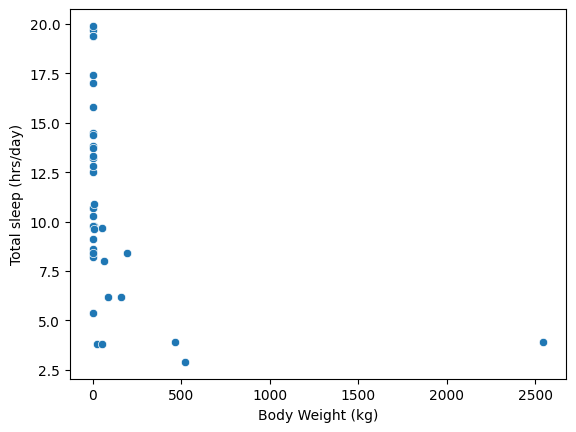

In [ ]:
sns.scatterplot(data=data, x='Body Weight (kg)', y='Total sleep (hrs/day)')

In [ ]:
import numpy as np

NumPy (Numerical Python) is a Python library used to work with numerical data in Python. Documentation [here](https://numpy.org/doc/stable/index.html)


In [ ]:
data['Body Weight log10'] = np.log10(data['Body Weight (kg)'])
sns.scatterplot(data=data, x='Body Weight log10', y='Total sleep (hrs/day)')
sns.despine()

In [ ]:
import scipy.stats as sci_stats

In [ ]:
sci_stats.linregress(data['Relative brain weight'], data['Total sleep (hrs/day)'])

### Practice making a few different plots here:

In [ ]:
# brief intro to Final Project:

In [ ]:
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
us_data.head(2)

In [ ]:
plt.plot(us_data['date'], us_data['cases_avg'])
plt.ylabel('Covid-19 cases')
sns.despine()

In [ ]:
# for more on Pandas:
# https://www.analyticsvidhya.com/blog/2021/05/pandas-functions-13-most-important/